In [1]:
import png
import matplotlib.pyplot as plt
import scipy.io as sio
import cv2

In [33]:
mat = sio.loadmat('./LSTM_PENN2.mat')

In [42]:
_objs = mat['prediction'][0][0][0]
print len(_objs)
# print mat['prediction'][0][0][0][0]
objs = [obj[0][0][0] for obj in _objs[:5]]
print len(objs), objs[0]

1068
5 (array([[151]], dtype=uint8), array([u'./Penn_Action/frames/0001'],
      dtype='<U25'), array([u'./Penn_Action/labels/0001.mat'],
      dtype='<U29'), array([[[134, 134, 133, ..., 230, 165, 165],
        [106, 208, 207, ..., 188, 186, 183],
        [ 72, 107, 108, ..., 128, 128, 160],
        ..., 
        [171, 173, 172, ..., 163, 197, 162],
        [146, 212, 208, ..., 358, 357,  87],
        [143, 289,  90, ..., 198, 197, 198]],

       [[ 69,  70,  70, ...,  62, 127, 122],
        [ 33,  51,  50, ..., 140, 140, 135],
        [ 24,  94,  94, ...,  75,  75, 144],
        ..., 
        [194, 198, 198, ..., 187, 256, 184],
        [322, 262, 264, ..., 135, 134, 165],
        [338, 356, 336, ..., 319, 319, 310]]], dtype=uint16), array([[[ 136.5 ,  131.25,  130.5 , ...,  165.  ,  165.  ,  164.25],
        [ 135.  ,  134.25,  134.25, ...,   93.75,   90.  ,   87.75],
        [ 102.75,  102.75,  102.75, ...,  159.75,  159.75,  160.5 ],
        ..., 
        [ 102.  ,  102.  ,  102. 

In [8]:
FILENAME_IND = 1
BBOX_IND = -1
PRED_IND = -2

In [14]:

testobj = objs[0]
fileName = testobj[FILENAME_IND][0].replace('./', './dataset/PENN/') + '/000001.jpg'
print fileName
testimg = cv2.imread(fileName, -1)
testimg = cv2.cvtColor(testimg, cv2.COLOR_BGR2RGB)
print type(testimg), testimg.shape

./dataset/PENN/Penn_Action/frames/0001/000001.jpg
<type 'numpy.ndarray'> (360, 480, 3)


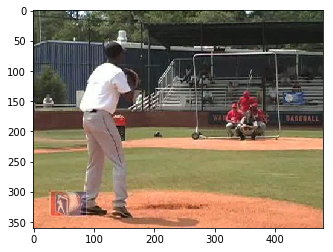

In [15]:
plt.imshow(testimg)
plt.show()

In [16]:
testbox = testobj[BBOX_IND][0]
x, y, x2, y2 = testbox
boximg = testimg.copy()
print x, y, x2, y2
asdf = cv2.rectangle(boximg, (int(x), int(y)), (int(x2), int(y2)),(0,255,0), 1)

86.25 45.75 168.75 350.25


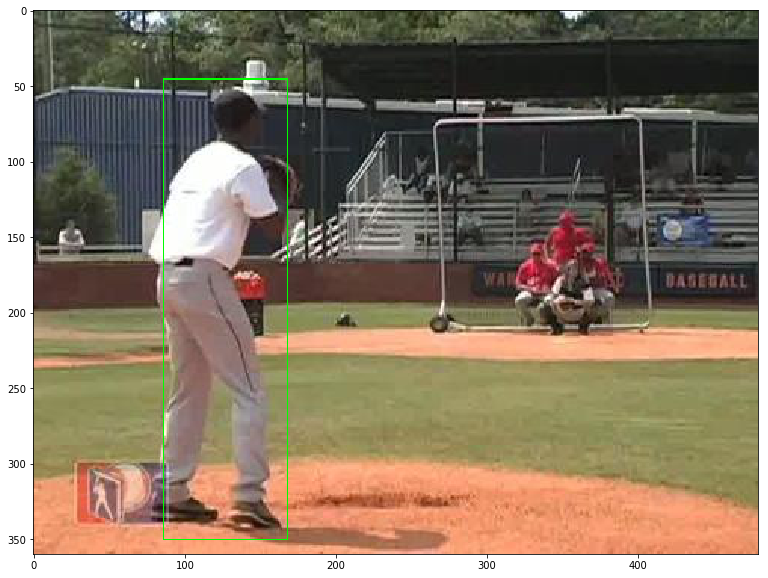

In [17]:
plt.figure(figsize=(14, 10))
plt.imshow(boximg)
plt.show()

(3, 13, 151)


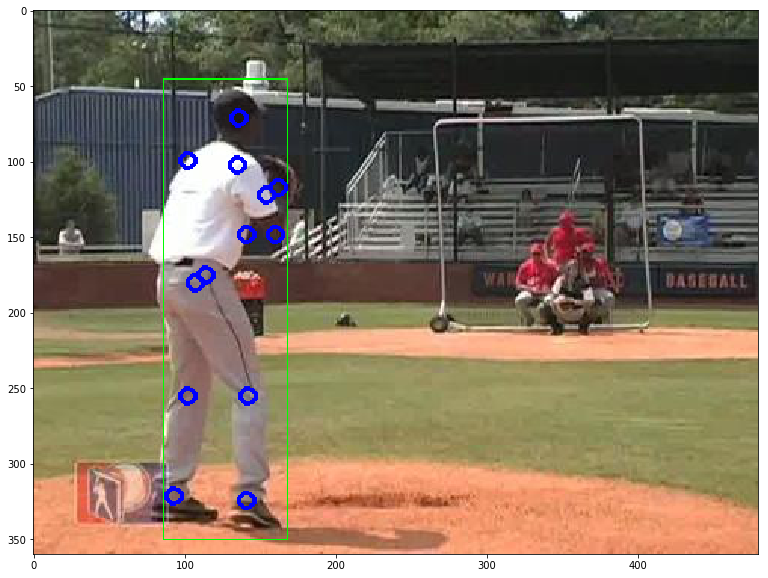

In [20]:
pred = testobj[PRED_IND]
pred0 = pred[:, :, 0]
print pred.shape

dotimg = boximg.copy()
for ii in range(pred0.shape[1]):
    px, py, occluded = pred0[:, ii]
    if px > x and px < x2 and py > y and py < y2:
        cv2.circle(dotimg, (int(px), int(py)), 5,(0,0,255), 2)
    
plt.figure(figsize=(14, 10))
plt.imshow(dotimg)
plt.show()

In [43]:
fourcc = cv2.VideoWriter_fourcc('M','J','P','G')

colors = [[255, 0, 0], [255, 85, 0], [255, 170, 0], [255, 255, 0], [170, 255, 0], [85, 255, 0], [0, 255, 0], \
          [0, 255, 85], [0, 255, 170], [0, 255, 255], [0, 170, 255], [0, 85, 255], [0, 0, 255], [85, 0, 255], \
          [170, 0, 255], [255, 0, 255], [255, 0, 170], [255, 0, 85]]

def pred2vid(preds):
    for ii in range(len(preds)):
        obj = preds[ii]
        fileName0 = obj[FILENAME_IND][0].replace('./', './dataset/PENN/') + ('/000001.jpg')
        print fileName0
        img0 = cv2.imread(fileName0, -1)
        outvid = cv2.VideoWriter('./videos/%d.mp4' % ii, fourcc, 30.0, (img0.shape[1], img0.shape[0]))
        nFrames = obj[0][0][0]
        for ff in range(nFrames):
            fileName = obj[FILENAME_IND][0].replace('./', './dataset/PENN/') \
                + ('/%s.jpg' % str(ff + 1).zfill(6))
            img = cv2.imread(fileName, -1)
            box0 = obj[BBOX_IND][ff]
            x, y, x2, y2 = box0
            boximg = cv2.rectangle(img, (int(x), int(y)), (int(x2), int(y2)),(0,255,0), 1)
            pred = obj[PRED_IND]
            pred0 = pred[:, :, ff]
            for ii in range(pred0.shape[1]):
                px, py, opt = pred0[:, ii]
                if px > x and px < x2 and py > y and py < y2:
                    cv2.circle(boximg, (int(px), int(py)), 3, colors[ii], 3)
            outvid.write(boximg)
        outvid.release()
        
pred2vid(objs)
print 'Done'

./dataset/PENN/Penn_Action/frames/0001/000001.jpg
./dataset/PENN/Penn_Action/frames/0010/000001.jpg
./dataset/PENN/Penn_Action/frames/0013/000001.jpg
./dataset/PENN/Penn_Action/frames/0014/000001.jpg
./dataset/PENN/Penn_Action/frames/0025/000001.jpg
Done
